## Exploratory Data Analysis

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
import seaborn as sns

#sklearn modules
from scipy import stats
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFE

from sklearn.model_selection import train_test_split,StratifiedShuffleSplit,GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [3]:
data = pd.read_csv('/content/drive/My Drive/Commercial_Property1.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2450 entries, 0 to 2449
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       2450 non-null   int64 
 1   name             2450 non-null   object
 2   sqft             2450 non-null   int64 
 3   sqm              2450 non-null   object
 4   psf              2450 non-null   int64 
 5   location         2449 non-null   object
 6   amenities        2450 non-null   object
 7   amenities_count  2450 non-null   int64 
 8   price            2450 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 172.4+ KB


In [5]:
data.describe()

,Unnamed: 0,sqft,psf,amenities_count,price
count,2450.000000,2450.000000,2450.000000,2450.000000,2.450000e+03
mean,1224.500000,4336.850612,2417.108571,2.081224,4.842904e+06
std,707.398403,14872.132029,13316.339298,2.475757,2.328868e+07
min,0.000000,4.000000,0.000000,0.000000,6.500000e+02
25%,612.250000,635.000000,478.250000,0.000000,9.000000e+05
50%,1224.500000,1504.500000,1619.500000,1.000000,1.650000e+06
75%,1836.750000,2932.750000,3045.750000,4.000000,3.300000e+06
max,2449.000000,327433.000000,649000.000000,8.000000,4.500000e+08


In [6]:
data.head()

,Unnamed: 0,name,sqft,sqm,psf,location,amenities,amenities_count,price
0,0,Factory in Shine@Tuas South,3391,315.03,478,Tuas (D22),[],0,1620735
1,1,Factory in Lam Soon Industrial Building,1658,154.03,802,Choa Chu Kang (D23),[],0,1330000
2,2,Office in Plus,3477,323.02,3088,Marina (D1),"['Air conditioning', 'Security access']",2,10736419
3,3,Office in Plus,1647,153.01,3258,Marina (D1),"['Air conditioning', 'Security access']",2,5365883
4,4,Office in Plus,2304,214.05,3272,Marina (D1),"['Air conditioning', 'Security access']",2,7537855


## Preprocessing

In [7]:
data = data.drop(['Unnamed: 0'], axis=1)
data["sqm"] = data["sqm"].str.replace(",","")
data["sqm"] = data["sqm"].astype("float")
data = data.dropna()
#data["amenities"] = data["amenities"].apply(lambda x: x.replace("'","").replace("[","").replace("]","").strip().split(","))
data["amenities"] = data["amenities"].apply(eval)
data.drop(data[data.psf > 20000].index, inplace=True)
data.drop(data[data.sqm > 20000].index, inplace=True)
data.drop(data[data.price > 150000000].index, inplace=True)
data.loc[(data.loc[:,"price"]<20000)]

,name,sqft,sqm,psf,location,amenities,amenities_count,price
247,General Industrial in Tradehub 21,150,13.94,7,Tuas (D22),"[Air conditioning, Car park]",2,1100
248,Office in North Bridge Centre,527,48.96,5,Rochor (D7),[],0,2372
249,Retail in 1 Engku Aman Turn,1550,144.00,5,Paya Lebar (D14),[],0,6975
315,Shophouse in Amoy Street,900,83.61,12,Marina (D1),[],0,10800
316,Office in Suntec City Towers,11840,1099.97,0,Marina (D1),[],0,3700
456,Showroom in Midview City,1528,141.96,3,Thomson (D20),"[Security access, Cctv, Car park, 24 hr access...",6,4890
457,Retail in Golden Mile Tower,549,51.00,4,Rochor (D7),[],0,2141
558,Shophouse in Teo Hong Road,1100,102.19,4,Tanjong Pagar (D2),"[Air conditioning, Bath room, Meeting rooms]",3,3999
559,Office in EPL Building,175,16.26,5,Commonwealth (D3),[Air conditioning],1,875
560,Retail in Alexis,194,18.02,13,Commonwealth (D3),"[Loading bay, Car park]",2,2500


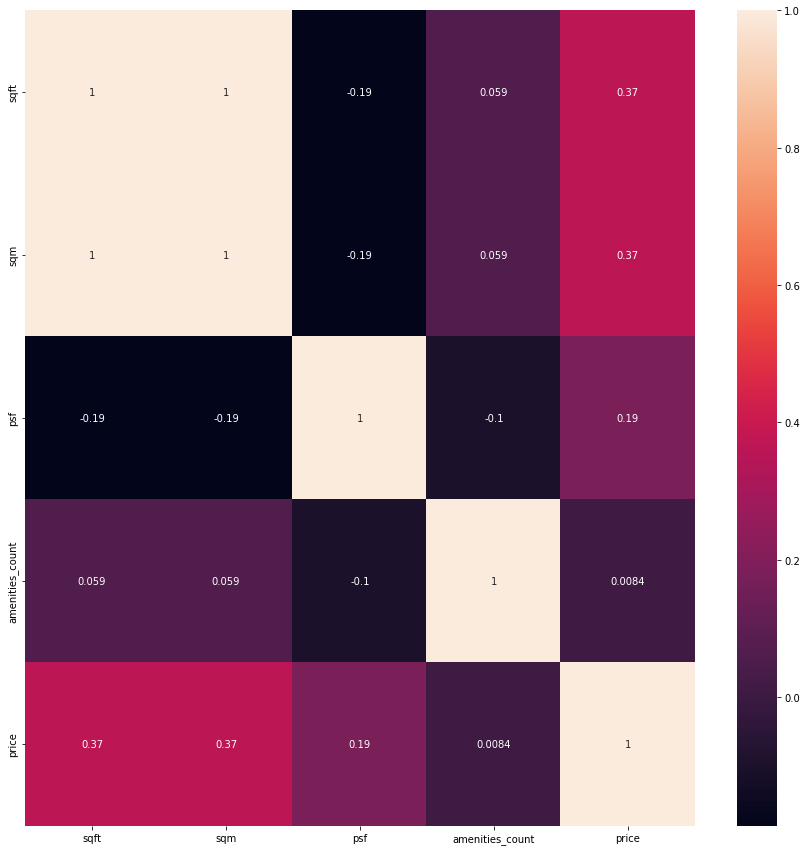

In [8]:
corr_matrix = data.corr()
fig,ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr_matrix, annot=True)

From our correlation matrix, we can see that sqft and sqm have the highest correlation.

In [9]:
columns = [c for c in data.columns]
s = data.amenities.explode()
data = data[columns].join(pd.crosstab(s.index, s))
data = data.fillna(0)
data.head()

,name,sqft,sqm,psf,location,amenities,amenities_count,price,24 hr access,450 lux lighting,Air conditioning,Av equipment,Backup generator,Bath room,Broadband,Car park,Cat 5/6 cabling,Cctv,Chilled water supply,Column free,Dual power,Dual power source,Dual telecom risers,Grease trap,Handicap friendly,Isdn,It support,Kitchen,Large floor plate,Loading bay,Meeting rooms,Own chiller plant,Own generator,Pantry,Raised floor,Reception services,Secretarial services,Security access,Server room,Svc/smatv system,Turnstile,Videoconferencing,Water trap
0,Factory in Shine@Tuas South,3391,315.03,478,Tuas (D22),[],0,1620735,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Factory in Lam Soon Industrial Building,1658,154.03,802,Choa Chu Kang (D23),[],0,1330000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Office in Plus,3477,323.02,3088,Marina (D1),"[Air conditioning, Security access]",2,10736419,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,Office in Plus,1647,153.01,3258,Marina (D1),"[Air conditioning, Security access]",2,5365883,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,Office in Plus,2304,214.05,3272,Marina (D1),"[Air conditioning, Security access]",2,7537855,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [10]:
data = data.drop("amenities",axis=1)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2435 entries, 0 to 2449
Data columns (total 42 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  2435 non-null   object 
 1   sqft                  2435 non-null   int64  
 2   sqm                   2435 non-null   float64
 3   psf                   2435 non-null   int64  
 4   location              2435 non-null   object 
 5   amenities_count       2435 non-null   int64  
 6   price                 2435 non-null   int64  
 7   24 hr access          2435 non-null   float64
 8   450 lux lighting      2435 non-null   float64
 9   Air conditioning      2435 non-null   float64
 10  Av equipment          2435 non-null   float64
 11  Backup generator      2435 non-null   float64
 12  Bath room             2435 non-null   float64
 13  Broadband             2435 non-null   float64
 14  Car park              2435 non-null   float64
 15  Cat 5/6 cabling      

### location against price

In [12]:
data.location.value_counts()

Paya Lebar (D14)           396
Tuas (D22)                 232
Marina (D1)                228
Commonwealth (D3)          150
Rochor (D7)                139
Yishun (D27)               137
Sengkang (D19)             129
Woodlands (D25)            125
Serangoon Rd (D8)           97
Toa Payoh (D12)             87
Thomson (D20)               87
Clementi (D5)               80
River Valley (D9)           68
Choa Chu Kang (D23)         63
Clarke Quay (D6)            60
Potong Pasir (D13)          56
Tanjong Pagar (D2)          56
Marine Parade (D15)         54
Upper Bukit Timah (D21)     43
Upper East Coast (D16)      38
Tampines (D18)              24
Holland (D10)               18
Changi Village (D17)        18
Telok Blangah (D4)          17
Upper Thomson (D26)         15
Novena (D11)                13
Yio Chu Kang (D28)           5
Name: location, dtype: int64

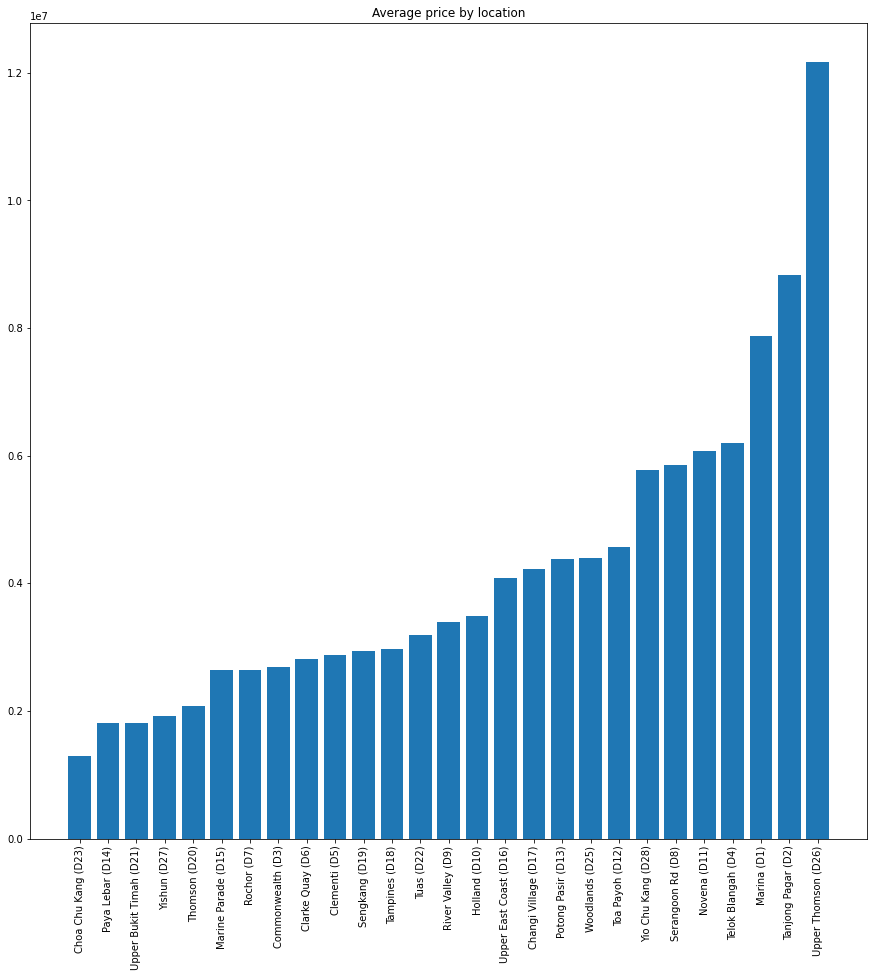

In [13]:
group_location = data.groupby(["location"])["price"].mean()

group_location_sorted = group_location.sort_values()

fig, ax = plt.subplots(figsize=(15, 15))
plt.bar(group_location_sorted.index, group_location_sorted.values)
plt.xticks(rotation=90)
plt.title("Average price by location")
#plt.ticklabel_format(style='plain')
#plt.ticklabel_format(useOffset=False)
plt.show()

In [14]:
encoder = OrdinalEncoder()
data["location"] = encoder.fit_transform(data["location"].values.reshape(-1,1))

### sqft against price

Pearson correlation pvalue = 4.3228025925887033e-79


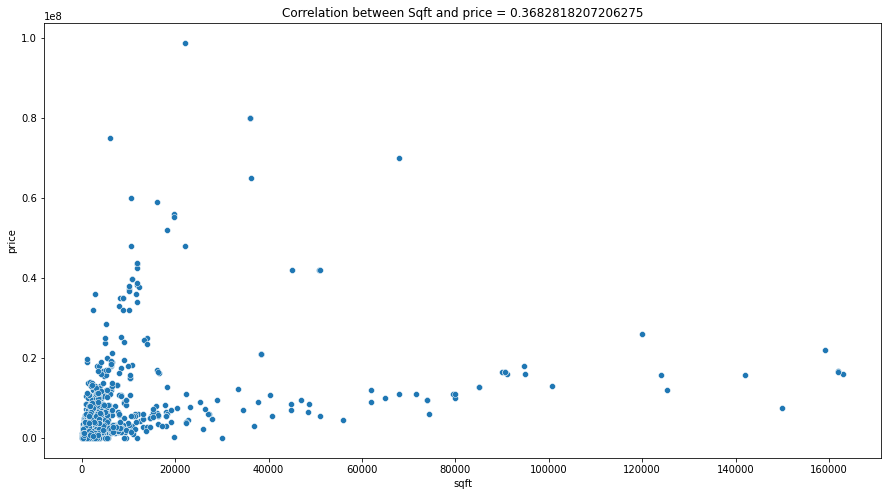

In [15]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.scatterplot(data=data, x='sqft', y='price', ax=ax)

r, pvalue = stats.pearsonr(data['sqft'], data['price'])
print(f'Pearson correlation pvalue = {pvalue}')

ax.set_title(f'Correlation between Sqft and price = {r}')
plt.show()

### sqm against price

Pearson correlation pvalue = 4.32251515729036e-79


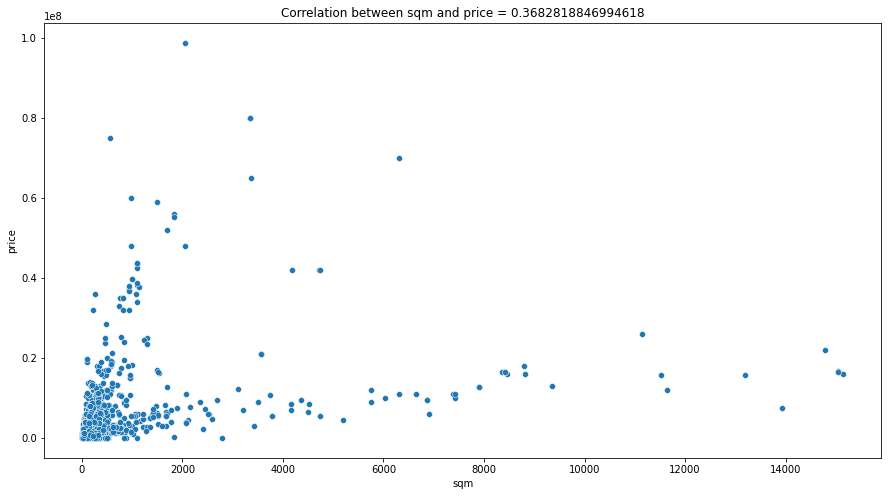

In [16]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.scatterplot(data=data, x='sqm', y='price', ax=ax)

r, pvalue = stats.pearsonr(data['sqm'], data['price'])
print(f'Pearson correlation pvalue = {pvalue}')

ax.set_title(f'Correlation between sqm and price = {r}')
plt.show()

### psf against price

Pearson correlation pvalue = 3.0552327660183926e-20


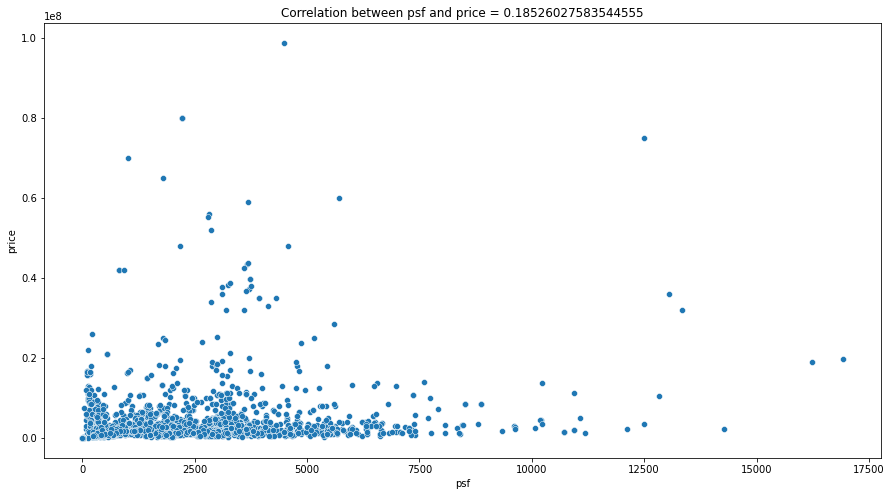

In [17]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.scatterplot(data=data, x='psf', y='price', ax=ax)

r, pvalue = stats.pearsonr(data['psf'], data['price'])
print(f'Pearson correlation pvalue = {pvalue}')

ax.set_title(f'Correlation between psf and price = {r}')
plt.show()

### amenities_count against price

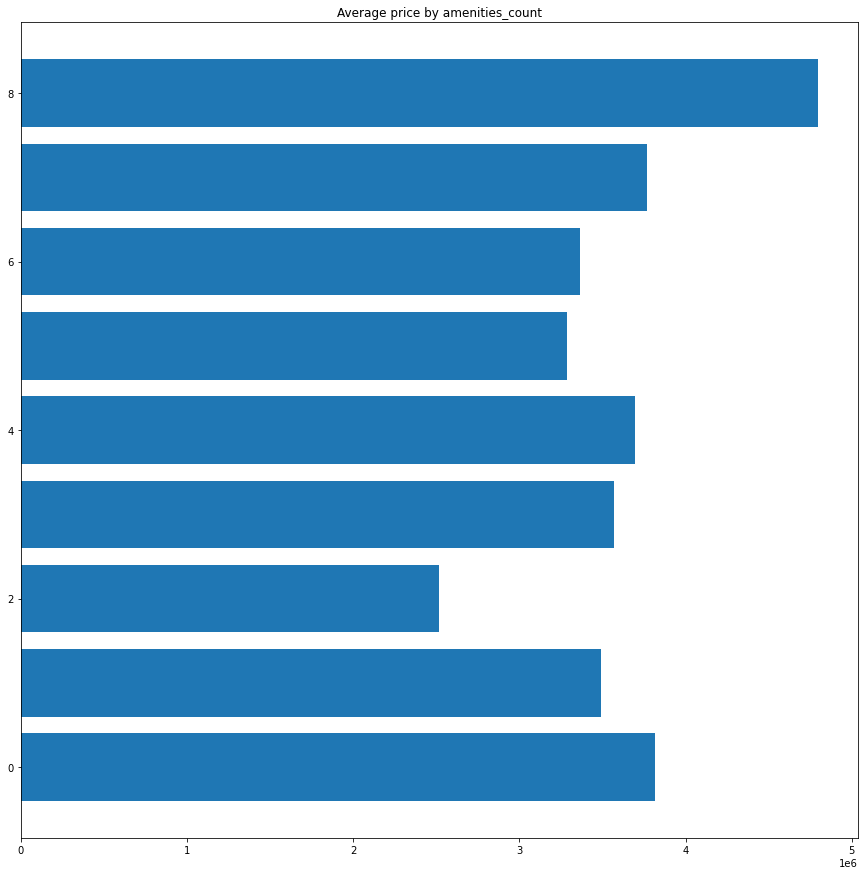

In [18]:
group_location = data.groupby(["amenities_count"])["price"].mean()

group_location_sorted = group_location.sort_values()

fig, ax = plt.subplots(figsize=(15, 15))
plt.barh(group_location_sorted.index, group_location_sorted.values)
#plt.xticks(rotation=90)
plt.title("Average price by amenities_count")
plt.show()

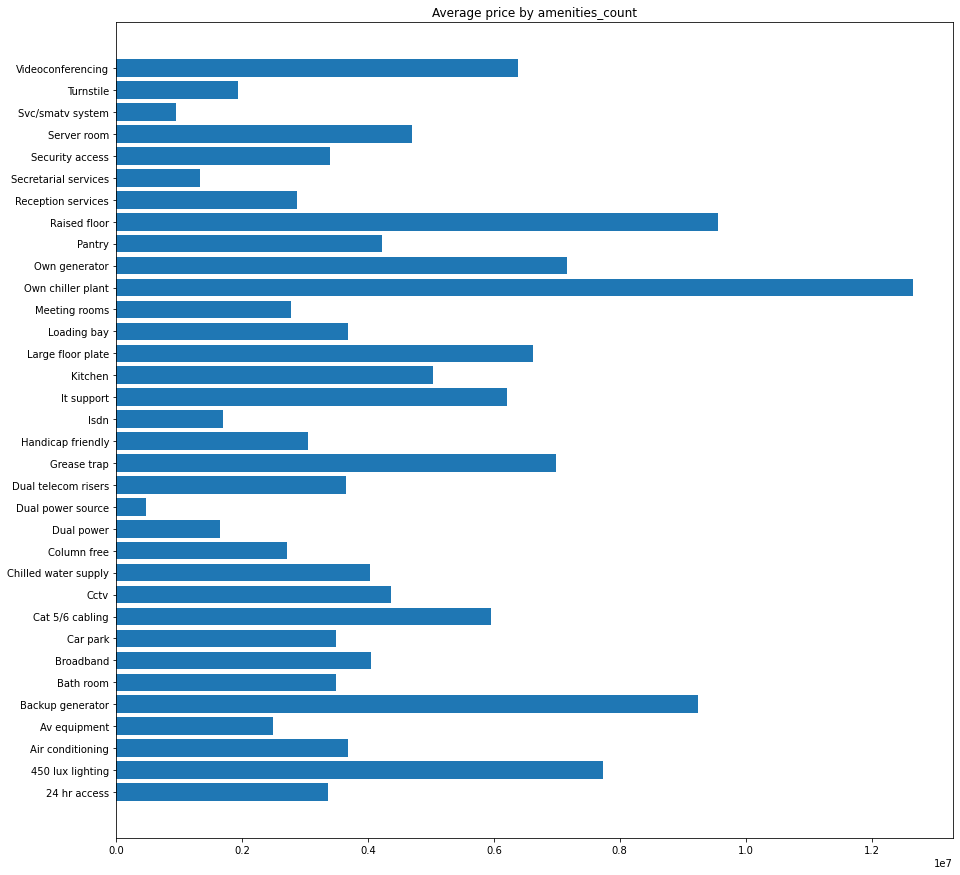

In [19]:
amenities_avg_price = []
columns = data.columns[7:-1]
for c in columns:
    amenities_avg_price.append(data.groupby([c])["price"].mean()[1.0])

fig, ax = plt.subplots(figsize=(15, 15))
plt.barh(columns, amenities_avg_price)
#plt.xticks(rotation=90)
plt.title("Average price by amenities_count")
plt.show()

## Train Test Split

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2435 entries, 0 to 2449
Data columns (total 42 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  2435 non-null   object 
 1   sqft                  2435 non-null   int64  
 2   sqm                   2435 non-null   float64
 3   psf                   2435 non-null   int64  
 4   location              2435 non-null   float64
 5   amenities_count       2435 non-null   int64  
 6   price                 2435 non-null   int64  
 7   24 hr access          2435 non-null   float64
 8   450 lux lighting      2435 non-null   float64
 9   Air conditioning      2435 non-null   float64
 10  Av equipment          2435 non-null   float64
 11  Backup generator      2435 non-null   float64
 12  Bath room             2435 non-null   float64
 13  Broadband             2435 non-null   float64
 14  Car park              2435 non-null   float64
 15  Cat 5/6 cabling      

In [21]:
columns = data.columns
feature_list = []
for c in columns:
    if c =="name" or c=="price":
        continue
    feature_list.append(c)

In [22]:
features = data[feature_list]
target = data["price"]

In [30]:
X_train, X_test, Y_train,  Y_test = train_test_split(features, target, test_size=0.2)
print('Training set size = ', len(X_train))
print('Testing set size = ', len(X_test))

Training set size =  1948
Testing set size =  487


# Model Building (Regression)

## Model Building: Linear Regression (Shane)
Common hyper-parameters to be tuned: 

In [49]:
# Basic LR
lr = LinearRegression()
lr.fit(X_train, Y_train)

X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.2)
lr.fit(X_train, Y_train)

predictions = lr.predict(X_test)
mse = mean_squared_error(Y_test, predictions)
rmse = np.sqrt(mse)

print('The root mean squared error is : ', rmse)

The root mean squared error is :  6428410.058401619


In [51]:
# Regularised ridge regression
model = Ridge(alpha=0.5)

X_train, X_test, Y_train, Y_test = train_test_split(features, target)
model.fit(X_train, Y_train)

predictions = model.predict(X_test)
mse = mean_squared_error(Y_test, predictions)
rmse = np.sqrt(mse)

print('The root mean squared error is : ', rmse)

The root mean squared error is :  6441521.94776043


## Model Building: Random Forest Regressor (Sweetha)
Common hyper-parameters to be tuned: 

## Model Building: Decision Tree Regressor (Han)
Common hyper-parameters to be tuned: 

## Model Building: Lasso (Han)
Common hyper-parameters to be tuned: 

## Model Evaluation (RMSE, MAE, R2)

## Cross Validation

## Hyper-parameter Tuning for best model